## Project: Write a Data Science Blog Post
#### Business Understanding
In this project, we are analyzing conflict events data in Sudan from 15 of April to 31 of may 2023. The goal is to gain insights into the types of conflict events, the regions most affected by the conflict, and to predict the likelihood of civilian casualties based on the conflict type, region, and time of day.
This script reads in a dataset of conflict events in Sudan from 15 of April to 31 of may 2023, and trying to answer the following questions:
1. what is the total fatalities caused by each conflicit type? and number of fatalities in each region?
2. What are the main drivers of conflict in Sudan, according to the ACLED data? Are these drivers consistent across different regions of the country, or do they vary depending on local circumstances?
3. How has the conflict in Sudan evolved over the past two years, and what factors have contributed to these changes? Have there been any significant turning points or events that have influenced the trajectory of the conflict?
4. What is the impact of the conflict in Sudan on civilians, and how has this changed over time? Are there particular groups or regions of the country that are especially vulnerable to violence, and if so, why? What efforts have been made to protect civilians and mitigate the effects of the conflict?



## data Understanding,
Access and Explore


In [1]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [2]:
# first step is loading data
cleaned_df = pd.read_csv('wardata.csv')
# View the first five rows of the data frame
#print(cleaned_df.head())


analyze data


what is the total fatalities caused by each conflicit type? and number of fatalities in each region?

In [3]:
# Group the data by conflict type and region, and then calculate summary statistics
conflict_types = cleaned_df.groupby('event_type')['fatalities'].sum().sort_values(ascending=False)
regions = cleaned_df.groupby('admin1')['fatalities'].sum().sort_values(ascending=False)

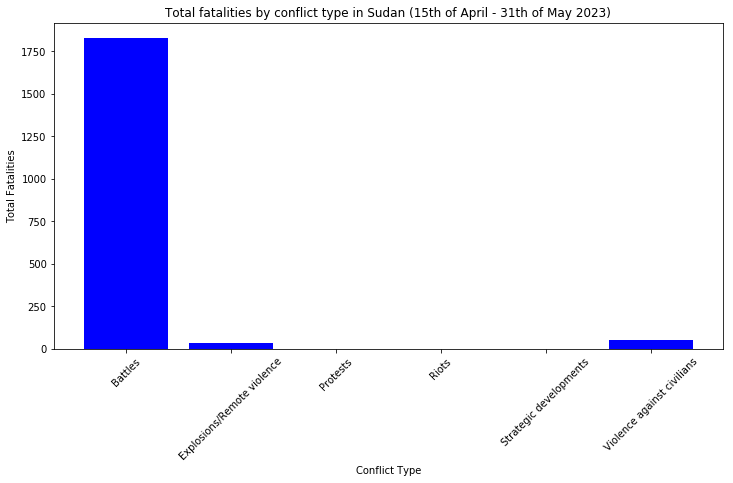

In [4]:
# Visualize the results using bar charts
plt.figure(figsize=(12,6))
plt.bar(x=conflict_types.index, height=conflict_types.values, color='blue')
plt.xticks(rotation=45)
plt.title('Total fatalities by conflict type in Sudan (15th of April - 31th of May 2023)')
plt.xlabel('Conflict Type')
plt.ylabel('Total Fatalities')
plt.show()

the above visual shows that the batteles have higest effect, and then voialiance aganist civilian

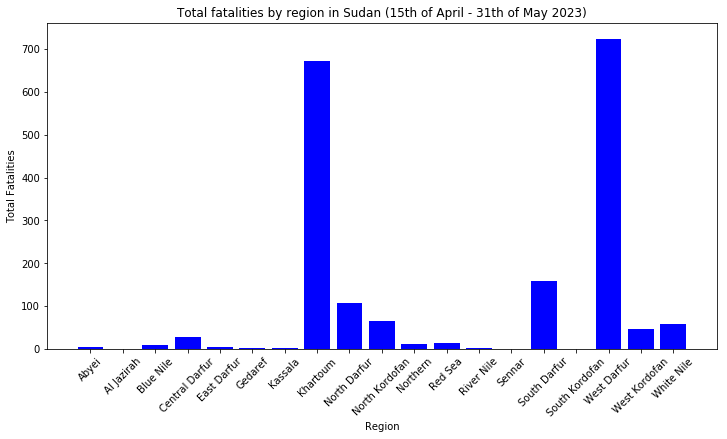

In [5]:
# Compute the total fatalities by region and visulize it.
plt.figure(figsize=(12,6))
plt.bar(regions.index, regions.values, color='blue')
plt.xticks(rotation=45)
plt.title('Total fatalities by region in Sudan (15th of April - 31th of May 2023)')
plt.xlabel('Region')
plt.ylabel('Total Fatalities')
plt.show()


to answer the question,Is there a trend in the number of conflict events over time during this period?

In [6]:

cleaned_df['event_date'] = pd.to_datetime(cleaned_df['event_date'])

# Group the data by month and count the number of events
monthly_events = cleaned_df.groupby(pd.Grouper(key='event_date', freq='M'))['event_type'].count()


To answer, What are the main drivers of conflict in Sudan, according to the ACLED data? Are these drivers consistent across different regions of the country, or do they vary depending on local circumstances?

In [7]:
# Group the data by event type and region, and calculate the total number of events
#grouped_data = cleaned_df.groupby(['event_type', 'admin1'])['event_id_cnty'].count().reset_index()
#grouped_data.rename(columns={'data_id': 'count'}, inplace=True)

event_counts = cleaned_df.groupby(['event_type', 'admin1']).size().reset_index(name='total_events')


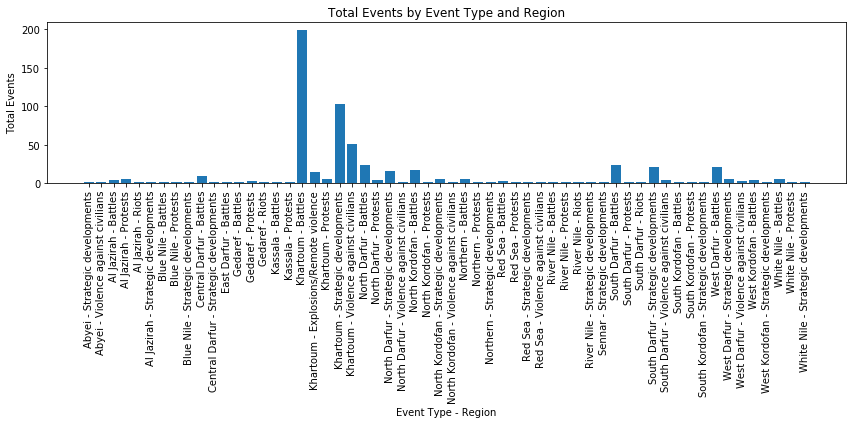

In [8]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(event_counts['admin1'] + ' - ' + event_counts['event_type'], event_counts['total_events'])
plt.xticks(rotation=90)
plt.xlabel('Event Type - Region')
plt.ylabel('Total Events')
plt.title('Total Events by Event Type and Region')
plt.tight_layout()
plt.show()

The above bar chart showing the distribution of event types across regions in Sudan, allowing us to identify the main drivers of conflict and how they vary by region.

 How has the conflict in Sudan evolved over the past two years?

In [9]:
# Group the data by date and count the number of events per day
daily_counts = cleaned_df.groupby('event_date')['event_type'].count()


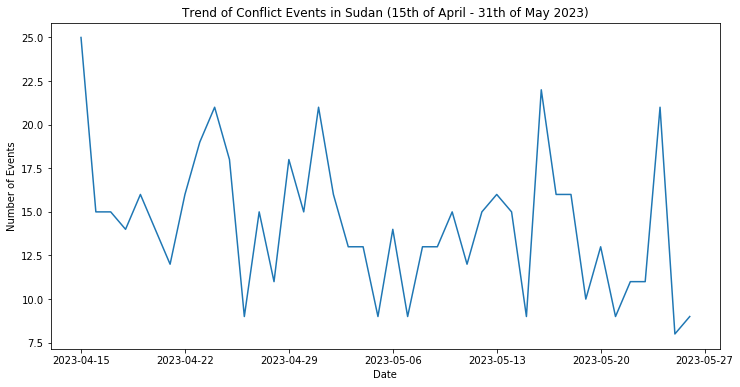

In [10]:
# Create a line plot to show the trend of conflict events over time
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Trend of Conflict Events in Sudan (15th of April - 31th of May 2023)')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

 line plot to show the trend of conflict events over time.

To identify significant turning points or events that might have influenced the trajectory of the conflict, we can examine the plot and look for any sudden spikes or dips in the number of events.

What is the impact of the conflict in Sudan on civilians, and how has this changed over time? Are there particular groups or regions of the country that are especially vulnerable to violence, and if so, why?

In [11]:
# Filter data to only include events that involve violence against civilians
civilian_df = cleaned_df[cleaned_df['event_type'] == 'Violence against civilians']

# Group the data by year and calculate the number of events and fatalities
yearly_stats = cleaned_df.groupby('year').agg({'event_type': 'count', 'fatalities': 'sum'})



Text(0.5,0,'Year')

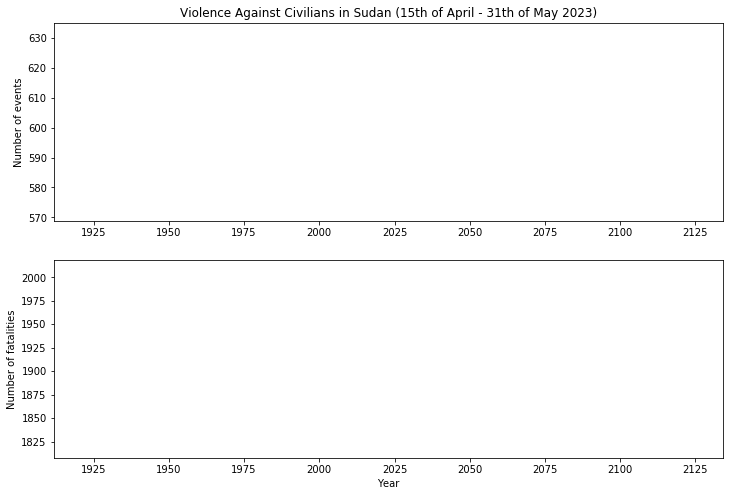

In [12]:
# Compute the year-to-year change in event counts and fatalities
yearly_stats['event_change'] = yearly_stats['event_type'].pct_change()
yearly_stats['fatality_change'] = yearly_stats['fatalities'].pct_change()

# Plot the number of events and fatalities over time
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(yearly_stats.index, yearly_stats['event_type'], label='Number of events')
ax[1].plot(yearly_stats.index, yearly_stats['fatalities'], label='Number of fatalities')

ax[0].set_title('Violence Against Civilians in Sudan (15th of April - 31th of May 2023)')
ax[0].set_ylabel('Number of events')
ax[1].set_ylabel('Number of fatalities')
ax[1].set_xlabel('Year')




Number of fatalities by region:
admin1
Abyei               5
Al Jazirah          0
Blue Nile          10
Central Darfur     28
East Darfur         4
Gedaref             3
Kassala             2
Khartoum          672
North Darfur      107
North Kordofan     66
Northern           11
Red Sea            15
River Nile          2
Sennar              0
South Darfur      158
South Kordofan      1
West Darfur       724
West Kordofan      47
White Nile         58
Name: fatalities, dtype: int64


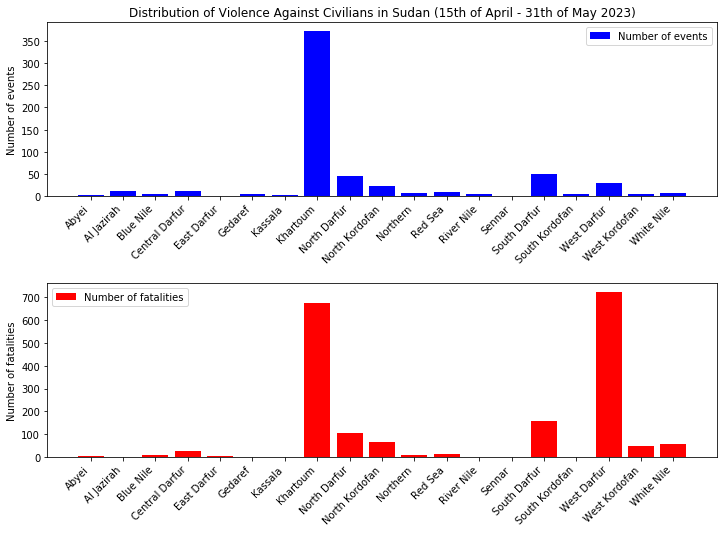

In [13]:
# Compute the number of events and fatalities by region
region_stats = cleaned_df.groupby('admin1').agg({'event_type': 'count', 'fatalities': 'sum'})

# Plot the distribution of events and fatalities by region
fig2, ax2 = plt.subplots(2, 1, figsize=(12, 8))
ax2[0].bar(region_stats.index, region_stats['event_type'], color='blue', label='Number of events')
ax2[1].bar(region_stats.index, region_stats['fatalities'], color='red', label='Number of fatalities')

# Print number of fatalities by region
print("Number of fatalities by region:")
print(region_stats['fatalities'])


ax2[0].set_title('Distribution of Violence Against Civilians in Sudan (15th of April - 31th of May 2023)')
ax2[0].set_ylabel('Number of events')

# Set the x-axis tick marks and labels for the first subplot
ax2[0].set_xticks(region_stats.index)
ax2[0].set_xticklabels(region_stats.index, rotation=45, ha='right')

ax2[1].set_ylabel('Number of fatalities')

# Set the x-axis tick marks and labels for the second subplot
ax2[1].set_xticks(region_stats.index)
ax2[1].set_xticklabels(region_stats.index, rotation=45, ha='right')

ax2[0].legend()
ax2[1].legend()
plt.subplots_adjust(hspace=0.5)






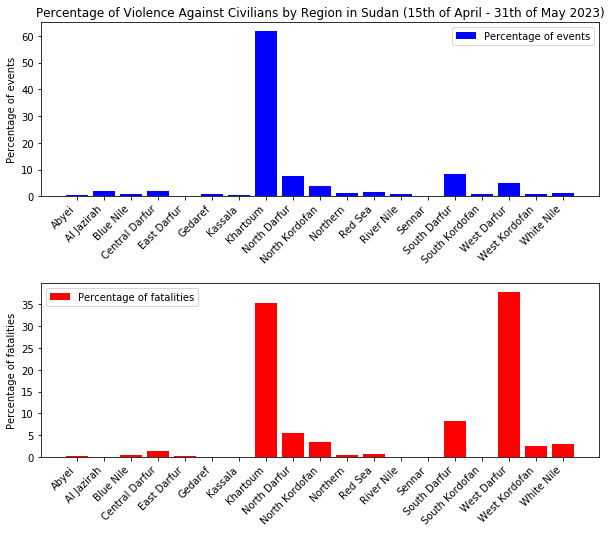

In [14]:
# Compute the percentage of events and fatalities that occur in each region
region_stats['event_pct'] = region_stats['event_type'] / region_stats['event_type'].sum() * 100
region_stats['fatality_pct'] = region_stats['fatalities'] / region_stats['fatalities'].sum() * 100

# Plot the percentage of events and fatalities by region
fig3, ax3 = plt.subplots(2, 1, figsize=(10, 8))
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax3[0].bar(region_stats.index, region_stats['event_pct'], color='blue', label='Percentage of events')
ax3[1].bar(region_stats.index, region_stats['fatality_pct'], color='red', label='Percentage of fatalities')

ax3[0].set_title('Percentage of Violence Against Civilians by Region in Sudan (15th of April - 31th of May 2023)')
ax3[0].set_ylabel('Percentage of events')
ax3[1].set_xticklabels(region_stats.index, rotation=45, ha='right')
ax3[1].set_ylabel('Percentage of fatalities')
ax3[0].set_xticklabels(region_stats.index, rotation=45, ha='right')
ax3[0].legend()
ax3[1].legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

here we include just events that involve violence against civilians. and then groups the data by year and calculates the number of events and fatalities for each year. and also computes the year-to-year change in event counts and fatalities.

Can we predict the likelihood of civilian casualties based on the conflict type, region, and time of day?
